In [17]:
import os
import spacy
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

__CWDIR__ = pathlib.Path.cwd()
local_cache_dir = __CWDIR__.parent.parent.joinpath('local_cache_data')

In [47]:
def loadDataHandler(path:str, use_col=None):
    rdata = None
    if use_col and isinstance(use_col, list):
        rdata = pd.read_csv(path, usecols=use_col)
    elif not use_col:
        rdata = pd.read_csv(path)
    return rdata

def barChartsPlot(dict_, title=None):
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    type_ = list(dict_.keys())
    values_ = list(dict_.values())
    ax.bar(type_,values_)
    plt.title(title)
    return plt

sample_data_1 = local_cache_dir.joinpath('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
sample_data_2 = local_cache_dir.joinpath('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
filter_col = ['reviews.title', 'reviews.text', 'reviews.rating', 'categories', 'primaryCategories']
# filter_col = None
data_1 = loadDataHandler(sample_data_1, use_col=filter_col)
data_2 = loadDataHandler(sample_data_2, use_col=filter_col)
data = pd.concat([data_1, data_2], axis=0).reset_index(drop=True)

In [38]:
data

,categories,primaryCategories,reviews.rating,reviews.text,reviews.title
0,"Computers,Electronics Features,Tablets,Electro...",Electronics,3,I thought it would be as big as small paper bu...,Too small
1,"Computers,Electronics Features,Tablets,Electro...",Electronics,5,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach
2,"Computers,Electronics Features,Tablets,Electro...",Electronics,4,Didnt know how much i'd use a kindle so went f...,Great for the price
3,"Computers,Electronics Features,Tablets,Electro...",Electronics,5,I am 100 happy with my purchase. I caught it o...,A Great Buy
4,"Computers,Electronics Features,Tablets,Electro...",Electronics,5,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids
...,...,...,...,...,...
33327,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,5,I got 2 of these for my 8 yr old twins. My 11 ...,Xmas gift
33328,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,4,I bought this for my niece for a Christmas gif...,yes it is a great tablet.
33329,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,5,"Very nice for light internet browsing, keeping...",You get a lot for the price!
33330,"Fire Tablets,Tablets,All Tablets,Amazon Tablet...",Electronics,5,This Tablet does absolutely everything I want!...,You get the entire World for less than $100!


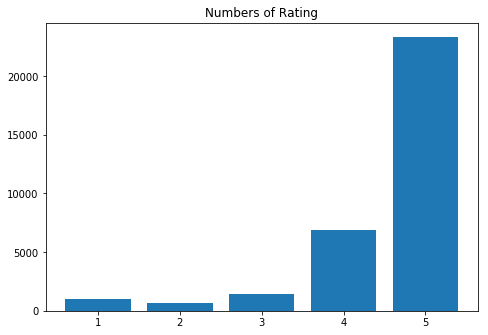

In [50]:
rating_dict = {}
for i in data['reviews.rating']:
    if i not in rating_dict:
        rating_dict[i] = 0
    rating_dict[i]+=1    
plt = barChartsPlot(rating_dict, title='Numbers of Rating')
plt.show()